**Data:**

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [3]:
df.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from pandas_profiling import ProfileReport
plt.ion()
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

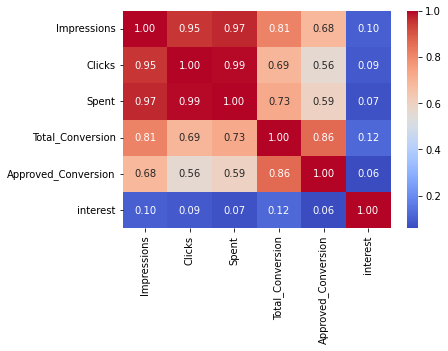

In [8]:
#Correlation Matrix
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","interest"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Here, we see that the columns are quite interrelated with each other.

In [9]:
df["xyz_campaign_id"].replace({916:"Campaign_1",936:"Campaign_2",1178:"Campaign_3"}, inplace=True)
df.head()

ad_id xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746      Campaign_1          103916  30-34      M        15   
1  708749      Campaign_1          103917  30-34      M        16   
2  708771      Campaign_1          103920  30-34      M        20   
3  708815      Campaign_1          103928  30-34      M        28   
4  708818      Campaign_1          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

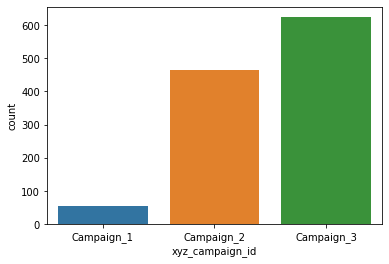

In [10]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

Campaign_3 showed the most ad's

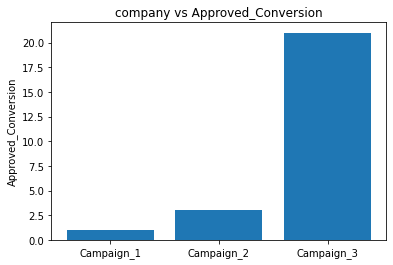

In [11]:
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

Campaign_3 had a great Approved Conversion while Campaign_1 showed good Approved Conversion given that it had very less number of ad's

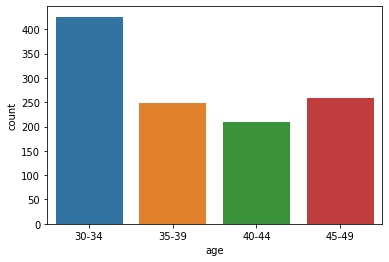

In [12]:
sns.countplot(x ='age', data = df) 
plt.show() 

The Age Group of 30-34 had seen the most amount of ad's

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

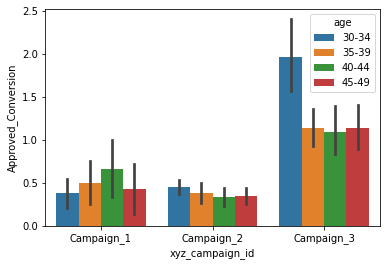

In [13]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=df)

In [14]:
sns.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 

In [15]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=df)


<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

Both the genders i.e. Male and Female had nearly equal contribution

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

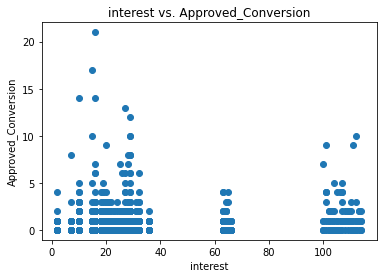

In [17]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

The Interesting Fact is that although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product

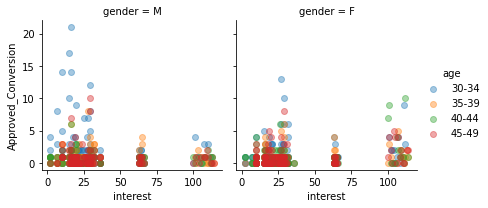

In [18]:
g = sns.FacetGrid(df, col="gender",hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

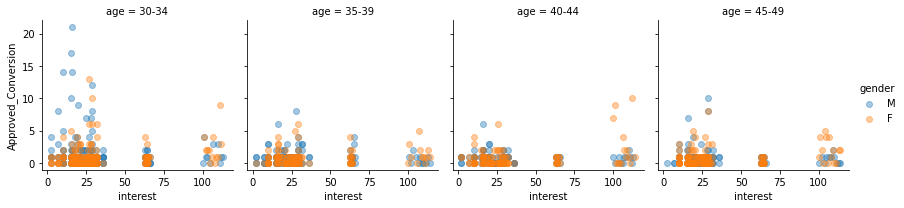

In [19]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

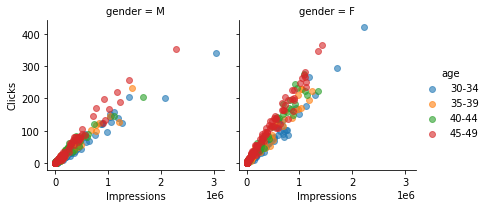

In [20]:
g = sns.FacetGrid(df,col = 'gender',hue = 'age')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.6)
g.add_legend()

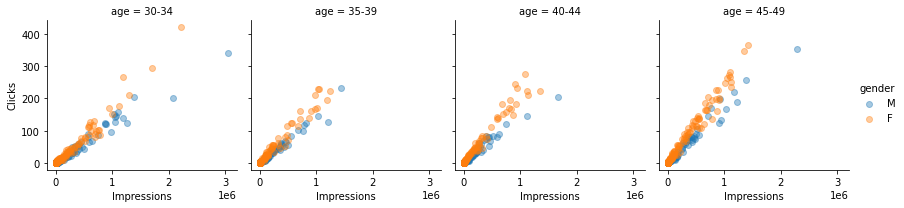

In [21]:
g = sns.FacetGrid(df,col = 'age',hue = 'gender')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()

In [22]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

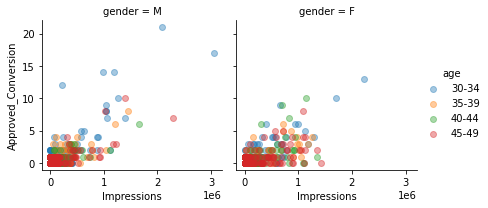

In [23]:
g = sns.FacetGrid(df, col="gender",hue= 'age')
g.map(plt.scatter, "Impressions", "Approved_Conversion", alpha=.4)
g.add_legend();

# SUMMARY
**Correlations:**
* All the columns are fairly correlated with each other.

**Campaign_3:**
1. Campaign_3 has most number of ads.
2. Campaign_3 has best Approved_conversion count.

**Age_group:** In Campaign_3 and Campaign_2, the age group of 30-34 shows more interest whereas in Campaign_1 the age group of 40-44 shows more interest.

**gender:**Both the genders shows similar interests in all three campaigns.

**interest:**Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

**Product bought after clicking the ad:**
8. It seems men tend to click more than women but women buy more products than men after clicking the add.
9. People in age group 30-34 has more tendency to buy product after clicking the add.

In [24]:
from sklearn.preprocessing import LabelEncoder
df["xyz_campaign_id"].replace({"Campaign_1":916 ,"Campaign_2":936 ,"Campaign_3":1178}, inplace=True)
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])

In [25]:
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
dtrain = xgb.DMatrix(x_train,y_train)
dtest  = xgb.DMatrix(x_val,y_val)


In [28]:
def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "gamma": trial.suggest_loguniform("gamma",0.05,1),
        "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
        "min_child_weight": trial.suggest_int("min_child_weight",5,11),
        "random_state": 2021
    }
    return(return_rmse(params)) 

In [29]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 20, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [30]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 300,show_progress_bar = True)

[I 2021-11-17 18:33:09,181] A new study created in memory with name: no-name-e6db497e-1005-42bc-b9f5-2b9f6760c9b0
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

4.018957
[I 2021-11-17 18:33:09,254] Trial 0 finished with value: 4.018957 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.6, 'eta': 0.01412646824688658, 'gamma': 0.6224474756100824, 'max_depth': 13, 'min_child_weight': 9}. Best is trial 0 with value: 4.018957.
2.875399
[I 2021-11-17 18:33:09,282] Trial 1 finished with value: 2.875399 and parameters: {'subsample': 0.6, 'colsample_bytree': 1.0, 'eta': 0.04511585432060054, 'gamma': 0.09479764485262826, 'max_depth': 5, 'min_child_weight': 8}. Best is trial 1 with value: 2.875399.
3.654672
[I 2021-11-17 18:33:09,319] Trial 2 finished with value: 3.654672 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.6, 'eta': 0.023197729245727702, 'gamma': 0.8694078319539634, 'max_depth': 9, 'min_child_weight': 8}. Best is trial 1 with value: 2.875399.
3.51437
[I 2021-11-17 18:33:09,363] Trial 3 finished with value: 3.51437 and parameters: {'subsample': 0.7, 'colsample_bytree': 1.0, 'eta': 0.02437934199875678, 'gamma': 0.095272111198991

In [31]:
from sklearn.metrics import mean_absolute_error
xgb_model = xgb.XGBRegressor(**(study1.best_params))

%time xgb_model.fit(x_train, y_train, early_stopping_rounds=7, eval_set=[(x_val, y_val)], verbose=False)

y_pred_xgb = xgb_model.predict(x_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print("MAE: ", mae_xgb)


CPU times: user 102 ms, sys: 0 ns, total: 102 ms
Wall time: 51.8 ms
MAE:  0.970551382506258
